All tests passed.
Exact integral (Newton-Leibniz): -0.454649
Darboux sums (lower, upper) and differences:
 n=4: L=-0.622156, U=-0.268119, U-L=0.354037
 n=8: L=-0.540787, U=-0.363769, U-L=0.177018
 n=16: L=-0.498311, U=-0.409802, U-L=0.088509
 n=32: L=-0.476628, U=-0.432373, U-L=0.044255
Numeric approximations for n=16:
 Rectangle (left): -0.498311
 Rectangle (mid): -0.454945
 Rectangle (right): -0.409802
 Rectangle (random): -0.446693
 Trapezoid: -0.454057
 Simpson : -0.454649


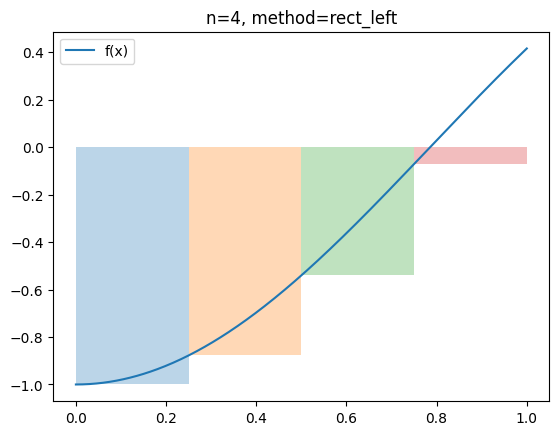

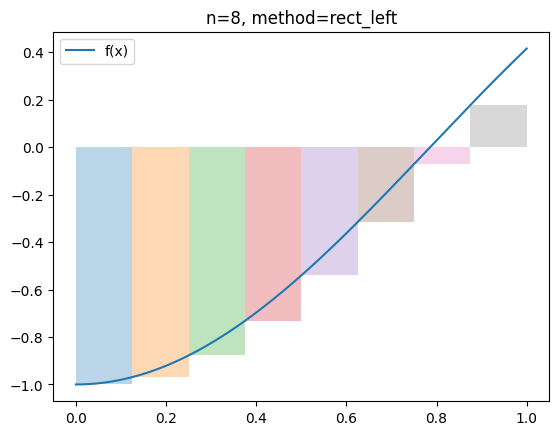

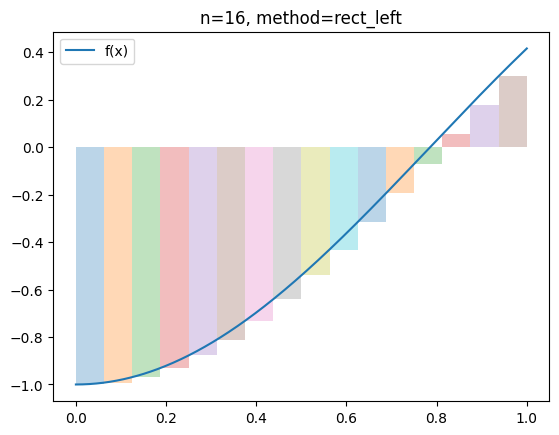

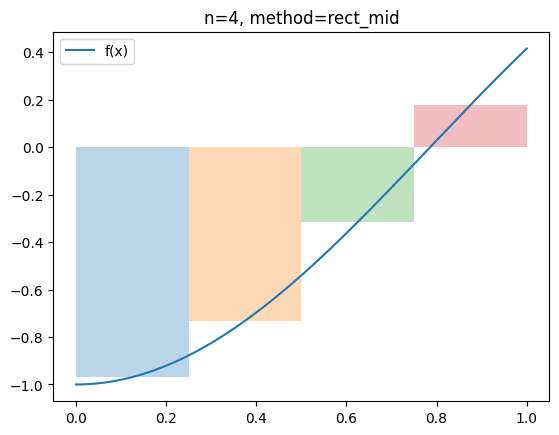

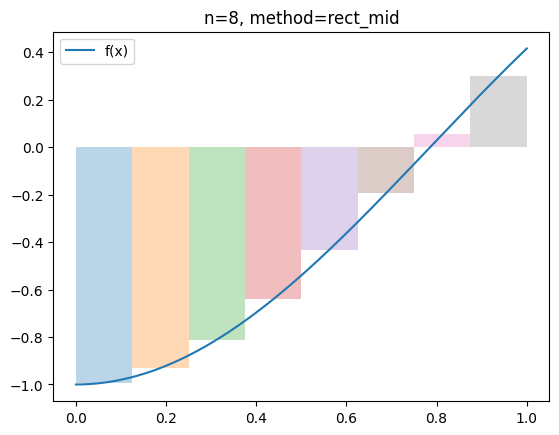

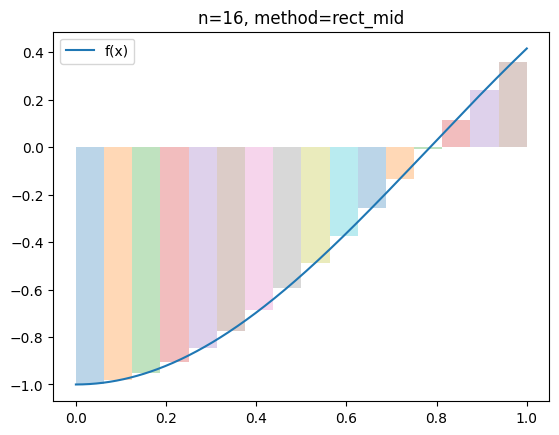

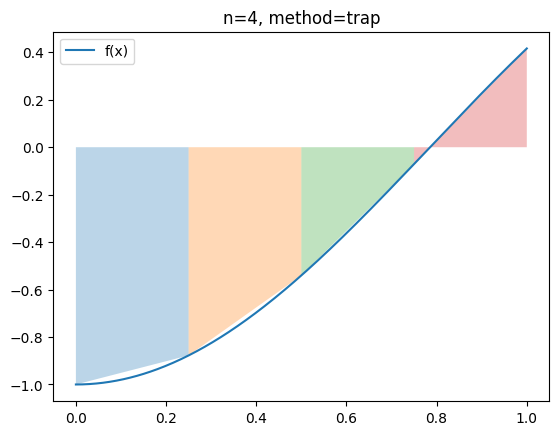

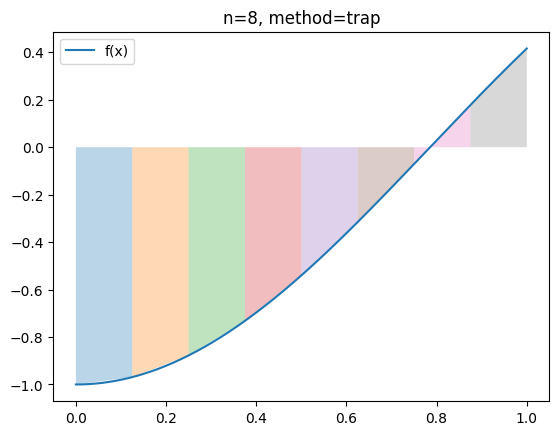

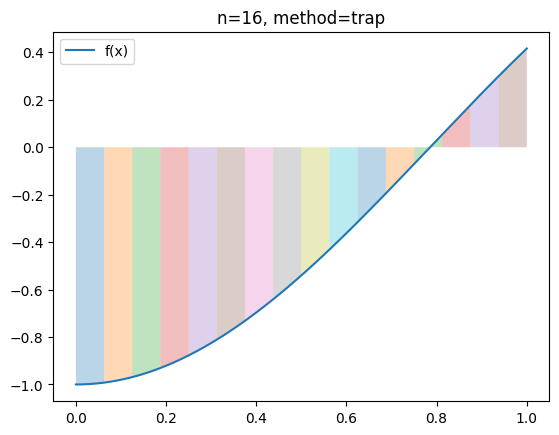

Errors (MAE, MSE):
 Rect mid: MAE=0.013939, MSE=0.000968
 Trapezoid: MAE=0.026741, MSE=0.003507
 Simpson: MAE=0.000737, MSE=0.000002


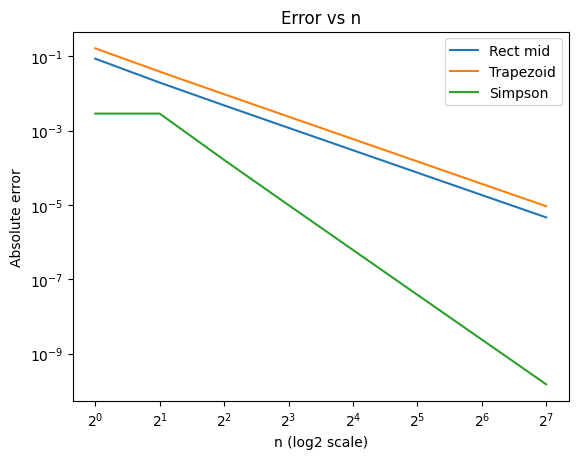

In [ ]:
'''
+ функции для аналитики
Практический этап для функции f(x) = -cos(2x) на отрезке [0,1]:
- Методы прямоугольников (левая, правая, середина, произвольная точка).
- Метод трапеций.
- Метод Симпсона.
- Графики закрашенных областей для n = 4,8,16.
- Сравнение численного и аналитического интеграла.
- Ошибки (MSE, MAE) при n = 1,2,4,...,128 и график зависимости ошибки от n.
- Тесты для всех методов.
'''
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable, List, Tuple
import math

# Функция
def f(x: float) -> float:
    return -math.cos(2*x)

# --- Аналитический этап ---
# 1. Верхняя и нижняя суммы Дарбу на равномерном разбиении

def darboux_sums(f: Callable, a: float, b: float, n: int) -> Tuple[float, float]:
    xs = np.linspace(a, b, n+1)
    lower_sum = 0.0
    upper_sum = 0.0
    for i in range(1, len(xs)):
        x0, x1 = xs[i-1], xs[i]
        # sup и inf на отрезке [x0, x1] для f(x) = -cos(2x)
        # cos(2x) монотонно убывает/растет на коротких отрезках, но можно найти экстремумы явно
        # используем дискретизацию для оценки
        sample = np.linspace(x0, x1, 10000)
        values = [-math.cos(2*t) for t in sample]
        lower_sum += min(values)*(x1-x0)
        upper_sum += max(values)*(x1-x0)
    return lower_sum, upper_sum

# 2. Проверка критерия Римана: при n->infinity разница upper-lower -> 0

def check_riemann(f: Callable, a: float, b: float, n_list: List[int]) -> List[float]:
    diffs = []
    for n in n_list:
        L, U = darboux_sums(f, a, b, n)
        diffs.append(U - L)
    return diffs

# 3. Точный интеграл через Дарбу (предел) и Ньютона-Лейбница
# \int_0^1 -cos(2x) dx = -[ (1/2) sin(2x) ]_0^1 = -(1/2) sin(2) + 0

def exact_integral() -> float:
    return -0.5 * math.sin(2)

# 4. Достаточное условие интегрируемости: f непрерывна на [0,1] => интегрируема по Риману
# (т.к. -cos(2x) непрерывна)

# --- Практический этап: численные методы ---

def rectangle_method(f: Callable, a: float, b: float, n: int, mode: str = 'left') -> float:
    xs = np.linspace(a, b, n+1)
    total = 0.0 
    for i in range(n):
        x0, x1 = xs[i], xs[i+1]
        if mode == 'left':
            xi = x0
        elif mode == 'right':
            xi = x1
        elif mode == 'mid':
            xi = 0.5*(x0 + x1)
        elif mode == 'random':
            xi = np.random.uniform(x0, x1)
        else:
            raise ValueError('Unknown mode')
        total += f(xi)*(x1-x0)
    return total
def trapezoid_method(f: Callable, a: float, b: float, n: int) -> float:
    xs = np.linspace(a, b, n+1)
    total = 0.0
    for i in range(1, len(xs)):
        total += (f(xs[i-1]) + f(xs[i]))*0.5*(xs[i] - xs[i-1])
    return total

def simpson_method(f: Callable, a: float, b: float, n: int) -> float:
    if n % 2 == 1:
        raise ValueError("n must be even for Simpson's method")
    xs = np.linspace(a, b, n+1)
    h = (b-a)/n
    total = f(xs[0]) + f(xs[-1])
    for i in range(1, n):
        coef = 4 if i % 2 == 1 else 2
        total += coef * f(xs[i])
    return total * h/3

# 3. Графики закрашенных областей
def plot_approximation(f: Callable, a: float, b: float, n: int, method: str):
    xs = np.linspace(a, b, 400)
    ys = [f(x) for x in xs]
    plt.figure()
    plt.plot(xs, ys, label='f(x)')
    xs_n = np.linspace(a, b, n+1)
    for i in range(n):
        x0, x1 = xs_n[i], xs_n[i+1]
        if method == 'rect_left':
            xi = x0; height = f(xi)
        elif method == 'rect_mid':
            xi = 0.5*(x0+x1); height = f(xi)
        elif method == 'trap':
            h0, h1 = f(x0), f(x1)
            plt.fill([x0, x0, x1, x1], [0, h0, h1, 0], alpha=0.3)
            continue
        else:
            raise ValueError
        plt.fill([x0, x0, x1, x1], [0, height, height, 0], alpha=0.3)
    plt.title(f"n={n}, method={method}")
    plt.legend()
    plt.show()
# 4-6. Ошибки MSE, MAE при разных n

def compute_errors(f_true: float, f_num_list: List[float]) -> Tuple[float, float]:
    errs = [abs(v - f_true) for v in f_num_list]
    mae = sum(errs)/len(errs)
    mse = sum(e**2 for e in errs)/len(errs)
    return mae, mse
# --- Тесты ---
def run_tests():
    a, b = 0.0, 1.0
    true = exact_integral()
    # Тест Darboux: разность верх. и ниж. сум -> уменьшается
    diffs = check_riemann(f, a, b, [4, 8, 16, 32])
    assert diffs[0] > diffs[1] > diffs[2] > diffs[3]
    # Тест методов при n=1000
    for mode in ['left', 'right', 'mid', 'random']:
        val = rectangle_method(f, a, b, 1000, mode)
        assert abs(val - true) < 1e-2
    trap = trapezoid_method(f, a, b, 1000)
    assert abs(trap - true) < 1e-4
    simp = simpson_method(f, a, b, 1000)
    assert abs(simp - true) < 1e-6
    # Тест ошибок
    n_list = [1,2,4,8,16,32,64,128]
    rects = [rectangle_method(f,a,b,n,'mid') for n in n_list]
    mae, mse = compute_errors(true, rects)
    assert mae < 0.5  # грубая проверка
    print("All tests passed.")
if __name__ == "__main__":
    run_tests()
    def main():
        a, b = 0.0, 1.0
        true_val = exact_integral()
        print(f"Exact integral (Newton-Leibniz): {true_val:.6f}")

        # Аналитический этап
        n_list = [4, 8, 16, 32]
        print("Darboux sums (lower, upper) and differences:")
        for n in n_list:
            L, U = darboux_sums(f, a, b, n)
            print(f" n={n}: L={L:.6f}, U={U:.6f}, U-L={(U-L):.6f}")

        print("Numeric approximations for n=16:")
        for mode in ['left', 'mid', 'right', 'random']:
            try:
                val = rectangle_method(f, a, b, 16, mode)
                print(f" Rectangle ({mode}): {val:.6f}")
            except Exception as e:
                print(e)
        print(f" Trapezoid: {trapezoid_method(f,a,b,16):.6f}")
        print(f" Simpson : {simpson_method(f,a,b,16):.6f}")
        for method in ['rect_left', 'rect_mid', 'trap']:
            for n in [4, 8, 16]:
                plot_approximation(f, a, b, n, method)
        ns = [1,2,4,8,16,32,64,128]
        methods = {
            'Rect mid': [rectangle_method(f,a,b,n,'mid') for n in ns],
            'Trapezoid': [trapezoid_method(f,a,b,n) for n in ns],
            'Simpson': [simpson_method(f,a,b,n if n%2==0 else n+1) for n in ns]
        }
        print("Errors (MAE, MSE):")
        for name, vals in methods.items():
            mae, mse = compute_errors(true_val, vals)
            print(f" {name}: MAE={mae:.6f}, MSE={mse:.6f}")

        # Графики
        plt.figure()
        for name, vals in methods.items():
            plt.plot(ns, [abs(v-true_val) for v in vals], label=name)
        plt.xscale('log', base=2)
        plt.yscale('log')
        plt.xlabel('n (log2 scale)')
        plt.ylabel('Absolute error')
        plt.title('Error vs n')
        plt.legend()
        plt.show()

    main()